In [1]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
from stockstats import StockDataFrame

In [2]:
pd.options.mode.chained_assignment = None
%matplotlib inline

In [3]:
data = pd.read_csv('ohlc-2012-12-31_2018-04-04.csv',sep=',', quoting=csv.QUOTE_ALL)

In [4]:
data.head()

,Date,Open,High,Low,Close
0,2012-12-31 00:00:00,13.45,13.56,13.37,13.51
1,2013-01-01 00:00:00,13.51,13.56,13.16,13.30
2,2013-01-02 00:00:00,13.30,13.40,13.16,13.28
3,2013-01-03 00:00:00,13.28,13.46,13.25,13.40
4,2013-01-04 00:00:00,13.40,13.52,13.27,13.50


### Filter Dataset

In [5]:
data = data.dropna()
data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")

In [6]:
data_to_predict = data
data = data[(data['Date'] < '2018-04-05')]
data = data.sort_values(by='Date') 
data.tail()

,Date,Open,High,Low,Close
1916,2018-03-31,6844.32,7213.50,6796.82,6926.02
1917,2018-04-01,6926.02,7034.93,6443.20,6816.74
1918,2018-04-02,6816.74,7108.20,6775.71,7049.79
1919,2018-04-03,7049.79,7506.68,7022.99,7417.89
1920,2018-04-04,7417.89,7419.80,6715.56,6789.30


### Way without stockDataFrame

In [7]:
#dataset['H-L'] = dataset['High'] - dataset['Low']
#dataset['O-C'] = dataset['Close'] - dataset['Open']
#dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
#dataset['7day MA'] = dataset['Close'].shift(1).rolling(window = 7).mean()
#dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
#dataset['Std_dev']= dataset['Close'].rolling(5).std()
#dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
#dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [8]:
dataset = data.copy()

In [9]:
stock = StockDataFrame.retype(data)
stock.get('open_3_sma')
stock.get('open_7_sma')
stock.get('open_30_sma')
stock['wr_7']
stock['rsi_14']
stock.head()

,open,high,low,close,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14
date,,,,,,,,,,,,
2012-12-31,13.45,13.56,13.37,13.51,13.450000,13.450,13.450,26.315789,NaN,NaN,NaN,NaN
2013-01-01,13.51,13.56,13.16,13.30,13.480000,13.480,13.480,65.000000,13.51,-0.21,0.000000,0.000000
2013-01-02,13.30,13.40,13.16,13.28,13.420000,13.420,13.420,70.000000,13.30,-0.02,0.000000,0.000000
2013-01-03,13.28,13.46,13.25,13.40,13.363333,13.385,13.385,40.000000,13.28,0.12,0.601073,37.541899
2013-01-04,13.40,13.52,13.27,13.50,13.326667,13.388,13.388,15.000000,13.40,0.10,1.140498,53.281903


dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Open'] - dataset['Close']
dataset['close_3_sma'] = stock.get('close_3_sma')
dataset['close_7_sma'] = stock.get('close_7_sma')
dataset['close_30_sma'] = stock.get('close_30_sma')
dataset['std_dev']= dataset['Close'].rolling(5).std()
dataset.tail()
#
#dataset['Std_dev']= dataset['Close'].rolling(5).std()
#dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
#dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso 

In [11]:
y = stock['close']


In [12]:
X = stock[['open', 'open_3_sma', 'open_7_sma', 'open_30_sma', 'wr_7', 'rsi_14']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X[1:],y[1:],test_size=0.4,random_state=4)

In [14]:
print(len(X))
print(len(X_train))
print(len(X_test))

1921
1152
768


In [15]:
model = Lasso()

In [16]:
model.fit(X_train,y_train)

/home/henry/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
predicted = model.predict(X_test)

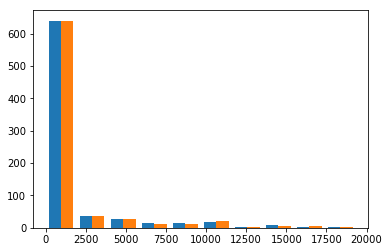

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test]);

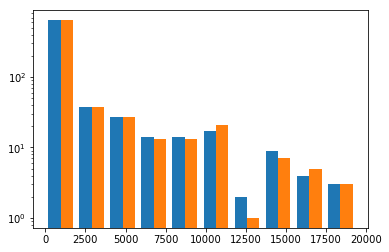

In [19]:
plt.hist([predicted, y_test], log=True);

In [20]:
model.score(X_test,y_test)

0.99510149741320242

# Predecir fecha Actual

In [21]:
data_to_predict.loc[data_to_predict.index[-1]+1] = ['2018-04-05', 6785.90, 6938.8, 6564.9, 6760]

In [22]:
data_to_predict = StockDataFrame.retype(data_to_predict)
data_to_predict.get('open_3_sma')
data_to_predict.get('open_7_sma')
data_to_predict.get('open_30_sma')
data_to_predict['wr_7']
data_to_predict['rsi_14']
data_to_predict.tail(1)

,open,high,low,close,open_3_sma,open_7_sma,open_30_sma,wr_7,close_-1_s,close_-1_d,rs_14,rsi_14
date,,,,,,,,,,,,
2018-04-05,6785.9,6938.8,6564.9,6760.0,6680.853333,6649.9,7448.732333,47.820273,6597.37,162.63,0.616418,38.134825


In [23]:
p = data_to_predict.tail(1)
model.predict(p[['open', 'open_3_sma', 'open_7_sma', 'open_30_sma', 'wr_7', 'rsi_14']])

array([ 6766.7389295])